## Introduction
Bellabeat is a high-tech manufacturer of health-focused products for women such as Bellabeat app, Leaf, Time, Spring, and Bellabeat membership. It was founded in 2013 by Urška Sršen and Sando Mur. The company is quite successful, with lots of potential to become a larger player in the global smart device industry. The founders are of the view that analyzing smart device fitness data could help unlock new growth opportunities for the company.

In this case study, I will follow the six steps of the data analysis process: **ask**, **prepare**, **process**, **analyze**, **share**, and **act**, to break down how I analyzed the FitBit fitness Tracker Data in order to gain some insights that could be beneficial to Bellabeat.

## <span style="color:#ed7674">1. ASK</span>

### Key Stakeholders:
1.	**Urška Sršen**: Cofounder and Chief Creative Officer at Bellabeat.
2.	**Sando Mur**: Cofounder and key member of the Bellabeat executive team. 
3.	**Marketing analytics team at Bellabeat**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.
4.	**Customers**: Everyone who purchases their product or use Bellabeat’s services. 

### Business Task:  
1.	To analyze FitBit Fitness Tracker Data from thirty eligible FitBit users, in order to gain some insights that could unlock new growth opportunities for the company. 
2.	To focus on one of Bellabeat’s products and analyze smart device data to gain insight into how customers are using their smart devices. For this case study, I will focus on the **Bellabeat membership program**. This is a subscription-based membership program that gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals

## <span style="color:#ed7674">2: PREPARE</span>

### Information about the Data Source:
1.	The data is a free to use FitBit Fitness tracker dataset made available through Mobius. It contains personal fitness tracker data from over thirty FitBit users who have consented to use their data. 
2.	There are 18 csv files in all, but the datasets I find relevant to the product I want to focus on are daily activity, hourly calories, hourly steps, and sleep day dataset. 

### Sorting the Data:
1.	To have a quick overview of the data I have chosen, I opened each of them in Google sheets. The first thing I noticed was that the data was organized in a long format. I also noticed that the dailyActivity_merged data contains some metrics that can give us some insights like the total steps taken by the Fitbit users, the active minutes spent, and the calories burned. With that we can establish some correlation between calories burned and the steps taken. The hourly calories and the hourly steps contain info about the activity hour that will help give some insight about calories and the time of the day.
2.	I then created a separate folder on my desktop to store the files, since I was going to use python and jupyter notebook to process the data. 

### Data Credibility:
1.	In terms of reliability, a general rule of thumb for the Large Enough Sample Condition is that the sample size should be greater than or equal to 30(Reviews, 2022). Hence, we can say that with 33 FitBit Users, we can derive some good insights that can be generalized.
2.	The data is also still current since it’s not older than 10 years.
3.	The data collected also matches Bellabeat’s products. Hence, some results from the analysis can be applied to Bellabeat’s products.
4.	Even though this is a third-party data, the quality of the data is not questionable. The source is also known.

## <span style="color:#ed7674">3: PROCESS</span>

### Loading Libraries

I started by loading the libraries I would need for processing and visualizing the data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime as dt

### Loading Datasets

Next, I loaded the four datasets I was interested in exploring for insights.

In [2]:
daily_activity = pd.read_csv('dailyActivity_merged.csv')
hourly_steps = pd.read_csv('hourlySteps_merged.csv')
hourly_calories = pd.read_csv('hourlyCalories_merged.csv')
sleepday = pd.read_csv('sleepDay_merged.csv')

### Data Exploration

I already viewed the data from my spreadsheet, but I decided to view them again, just to be sure everything loaded perfectly. So, I pulled up the first five rows starting with the daily activity dataset.

In [3]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Seeing that everything looks good, I moved on to the hourly steps data.

In [4]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


Then, the hourly calories data.

In [5]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


And finally, the sleepday data.

In [6]:
sleepday.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


### Inspecting the data types

Next, I decided to inspect the data types to be sure the columns are stored in the right data type. 

In [7]:
daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

After running the daily activity data, I noticed that every other column are in the right data type except for the ActivityDate that is in the **object** format instead of **datetime** format. I took note of that so that I can remember to fix it when I'm manipulating the data.

In [8]:
hourly_steps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

Here, the ActivityHour is also an **object** instead of a **datetime** data type.

In [9]:
hourly_calories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

Same here. The ActivityHour is an **object**

In [10]:
sleepday.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

SleepDay is also an **object** isntead of a **datetime** datatype. I will revisit them when transforming the data so that it will be easy to perform calculations with them.

### Checking for Unique Users

Next, I checked to see the number of users in each dataset to see if it meets the minimum sample size.

In [11]:
daily_activity.Id.nunique()

33

In [12]:
hourly_steps.Id.nunique()

33

In [13]:
hourly_calories.Id.nunique()

33

In [14]:
sleepday.Id.nunique() 

24

I observed that only 24 Ids were recorded in the sleepday dataset. Hence, it did not meet the minimum sample size. So, I decided to take it out as this could lead to some bias in my analysis.

### Checking the number of columns and rows
Next I checked to see the number of rows and columns in each dataset. 

In [15]:
daily_activity.shape

(940, 15)

In [16]:
hourly_steps.shape

(22099, 3)

In [17]:
hourly_calories.shape

(22099, 3)

The daily activity data contains 940 rows and 15 columns. The hourly steps and hourly calories contains thesame number of rows and columns. This will make it easier when merging both datasets.

### Data Cleaning

#### Checking for Empty cells
I started the cleaning process by checking if there are empty cells in each of the dataset.

In [18]:
daily_activity.isnull().any()

Id                          False
ActivityDate                False
TotalSteps                  False
TotalDistance               False
TrackerDistance             False
LoggedActivitiesDistance    False
VeryActiveDistance          False
ModeratelyActiveDistance    False
LightActiveDistance         False
SedentaryActiveDistance     False
VeryActiveMinutes           False
FairlyActiveMinutes         False
LightlyActiveMinutes        False
SedentaryMinutes            False
Calories                    False
dtype: bool

In [19]:
hourly_steps.isnull().any()

Id              False
ActivityHour    False
StepTotal       False
dtype: bool

In [20]:
hourly_calories.isnull().any()

Id              False
ActivityHour    False
Calories        False
dtype: bool

There are **no** empty cells in all three datasets.

#### Checking for duplicates
Next I checked if there are duplicates in the dataset.

In [21]:
daily_activity.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
935    False
936    False
937    False
938    False
939    False
Length: 940, dtype: bool

In [22]:
hourly_steps.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22094    False
22095    False
22096    False
22097    False
22098    False
Length: 22099, dtype: bool

In [23]:
hourly_calories.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22094    False
22095    False
22096    False
22097    False
22098    False
Length: 22099, dtype: bool

All came out **false**, meaning there are no duplicated cells. 

#### Data Transformation

As part of making sure that my data is clean and ready for analysis, I decided to transform the ActivityDate and ActivityHour from object data type to datetime type.

In [24]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
hourly_calories["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])



Next, I ran the info of all the datasets to be sure that they are now in the right data type.

In [25]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

The ActivityDate is now a datetime data type, which is great. 

Next, I ran the info of the hourly steps dataset.

In [26]:
hourly_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   StepTotal     22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


Great! The ActivityHour is also now a **datetime** data type.

Finally, I checked the info for hourly calories dataset.

In [27]:
hourly_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   Calories      22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


Here, the ActivityHour is also now a datetime datatype. 

## <span style="color:#ed7674">4. ANALYZE</span>
Now that my data is clean, it's time to analyze the data for insights.  

### Creating New Columns

To make the analysis process smooth, I started by creating a new column (**WeekDay**) for the days of the week in the datasets. From the daily activity dataset, I created WeekDay from the ActivityDate, and from the hourly steps, I created WeekDay from the ActivityHour.

In [28]:
daily_activity["WeekDay"] = daily_activity["ActivityDate"].dt.day_name()
hourly_steps["WeekDay"] = hourly_steps["ActivityHour"].dt.day_name()

Next, I checked to see if the column WeekDay has being created and that it is displaying correctly.

In [29]:
daily_activity["WeekDay"].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: WeekDay, dtype: object

In [30]:
hourly_steps["WeekDay"].head()

0    Tuesday
1    Tuesday
2    Tuesday
3    Tuesday
4    Tuesday
Name: WeekDay, dtype: object

Seeing that a new colum (**WeekDay**) has been created. I also decided to create 2 additional columns(**TotalActiveMinutes** and **TotalMinutes**) for Daily Activity dataset.

In [31]:
new_cols = ["Id", "ActivityDate", "WeekDay", "TotalSteps", "TotalDistance", "VeryActiveDistance", "ModeratelyActiveDistance", "LightActiveDistance", "SedentaryActiveDistance", "VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes", "TotalActiveMinutes", "TotalMinutes", "Calories"]

daily_activity = daily_activity.reindex(columns=new_cols)



Then I called the columns to see if they have been created.

In [32]:
daily_activity[["TotalActiveMinutes", "TotalMinutes"]].head()

,TotalActiveMinutes,TotalMinutes
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


Awesome! The **TotalActiveMinutes** and **TotalMinutes** columns have been created, but they currently don't have any values since they have not been created. 

For the **TotalActiveMinutes**, I created the value by by summing up all the active minutes i.e 
VeryActiveMinutes, FairlyActiveMinutes, and LightActiveMinutes and for the **TotalMinutes**, I summed up the total active minutes and the sedentary minutes.

In [33]:
daily_activity["TotalActiveMinutes"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"]
daily_activity["TotalMinutes"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"] + daily_activity["SedentaryMinutes"]
               
               

Then I checked to see if we now have values for TotalActiveMinutes and TotalMinutes. 

In [34]:
daily_activity[["TotalActiveMinutes", "TotalMinutes"]].head()

,TotalActiveMinutes,TotalMinutes
0,366,1094
1,257,1033
2,222,1440
3,272,998
4,267,1040


Seeing that I now have values for the TotalActiveMinutes and TotalMinutes, I went on to create values for the TotalActiveHour. To do this, I simply divided TotalActiveMinutes by 60.

In [35]:
daily_activity["TotalActiveHours"] = round(daily_activity["TotalActiveMinutes"] / 60)
daily_activity["TotalActiveHours"].head()


0    6.0
1    4.0
2    4.0
3    5.0
4    4.0
Name: TotalActiveHours, dtype: float64

Now the values for TotalActiveHours has been created. 

### Merging Hourly Calories and Hourly Steps Dataset
Next, I decided to merge the hourly calories and hourly steps. With this I can have the StepTotal and Calories in one data frame for easy analysis.

In [36]:
newhour_merged = pd.merge(hourly_steps, hourly_calories, on=["Id", "ActivityHour"])
newhour_merged.head()


,Id,ActivityHour,StepTotal,WeekDay,Calories
0,1503960366,2016-04-12 00:00:00,373,Tuesday,81
1,1503960366,2016-04-12 01:00:00,160,Tuesday,61
2,1503960366,2016-04-12 02:00:00,151,Tuesday,59
3,1503960366,2016-04-12 03:00:00,0,Tuesday,47
4,1503960366,2016-04-12 04:00:00,0,Tuesday,48


Now that my data is ready for analysis, I called the first 7 rows to have another glance at the dataset, and to be sure that all the columns are displaying correctly. 

In [37]:
daily_activity.head(7)

,Id,ActivityDate,WeekDay,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,Calories,TotalActiveHours
0,1503960366,2016-04-12,Tuesday,13162,8.50,1.88,0.55,6.06,0.0,25,13,328,728,366,1094,1985,6.0
1,1503960366,2016-04-13,Wednesday,10735,6.97,1.57,0.69,4.71,0.0,21,19,217,776,257,1033,1797,4.0
2,1503960366,2016-04-14,Thursday,10460,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,222,1440,1776,4.0
3,1503960366,2016-04-15,Friday,9762,6.28,2.14,1.26,2.83,0.0,29,34,209,726,272,998,1745,5.0
4,1503960366,2016-04-16,Saturday,12669,8.16,2.71,0.41,5.04,0.0,36,10,221,773,267,1040,1863,4.0
5,1503960366,2016-04-17,Sunday,9705,6.48,3.19,0.78,2.51,0.0,38,20,164,539,222,761,1728,4.0
6,1503960366,2016-04-18,Monday,13019,8.59,3.25,0.64,4.71,0.0,42,16,233,1149,291,1440,1921,5.0


All the days of the week are displaying as they should. Also, the newly created columns, TotalActiveMinutes, and TotalActiveHours are also showing correctly.

### SUMMARY
Lastly, I ran the describe function to get the statistical summary of the daily_activity dataset.

In [38]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,Calories,TotalActiveHours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,227.542553,1218.753191,2303.609574,3.775532
std,2.424805e+09,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,121.776307,265.931767,718.166862,2.057646
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,146.750000,989.750000,1828.500000,2.000000
50%,4.445115e+09,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,247.000000,1440.000000,2134.000000,4.000000
75%,6.962181e+09,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,317.250000,1440.000000,2793.250000,5.000000
max,8.877689e+09,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,552.000000,1440.000000,4900.000000,9.000000


#### Some Key Findings
1. Out of 1218 Total minutes, 991 minutes were spent inactive (Sedentary)
2. There was an average of 7638 total steps taken by the users daily.
3. There is also an average of 2304 calories burnt daily.
4. There is a positive correlation between steps taken and calories burnt.

## <span style="color:#ed7674">5. SHARE</span>
To visualize the data, I started by loading some more libraries I would need.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

### Sedentary Minutes Vs Total Active Minutes

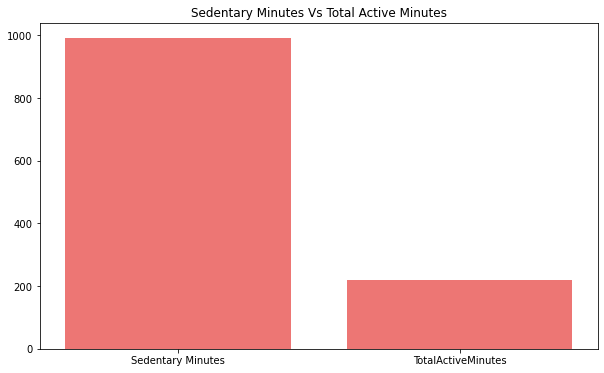

In [40]:
median_sedentaryminutes = 991
median_TotalActiveMinutes = 228

fig, ax = plt.subplots(figsize=(10,6))
x = np.array(["Sedentary Minutes", "TotalActiveMinutes"])
y = np.array([991, 220])
plt.title("Sedentary Minutes Vs Total Active Minutes")
plt.bar(x, y, width = 0.8, color = "#ed7674")
plt.show()

There is a huge gap between Sedentary minutes and Total Active Minutes. It is obvious that the users pend more time sitting or lying down, than they do being active. This can also say something about their occupation or lifestyle. Mostly likely they belong to the working class that spends countless hours behind their desk.

### Total Calories by Day of the Week

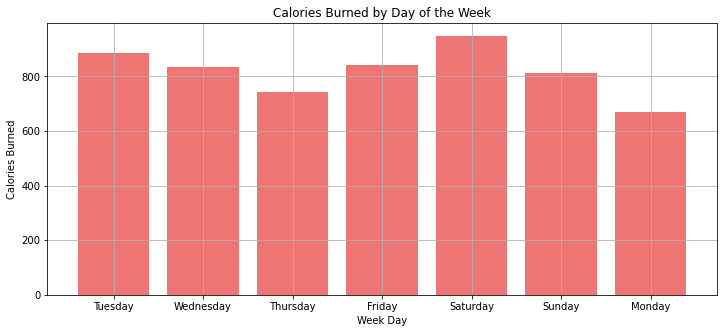

In [41]:
fig, ax = plt.subplots(figsize=(12,5))
plt.bar(newhour_merged.WeekDay, newhour_merged.Calories, color = "#ed7674")
plt.xlabel("Week Day")
plt.ylabel("Calories Burned")
plt.title("Calories Burned by Day of the Week")
plt.grid()

plt.show()

Interestingly, the least calories were burnt on **Monday**, which is quite strange for a day that is usually considered one of the busiest days at work. The first thing that came to mind is that the user are probably very busy on Mondays that they barely have enough time to exercise or take a walk. 

So, I checked the Total Steps by Day of the Week.

### Total Steps By Day of The Week

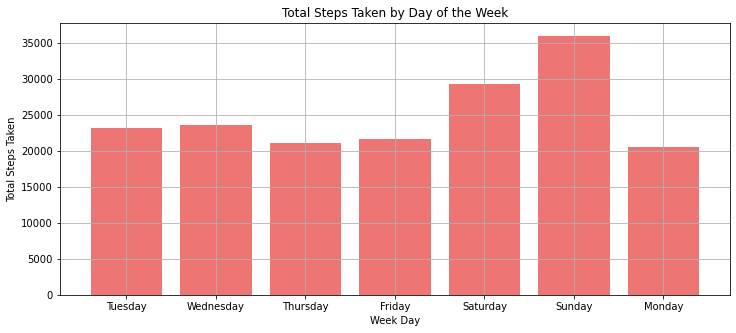

In [42]:
fig, ax = plt.subplots(figsize=(12,5))
plt.bar(daily_activity.WeekDay, daily_activity.TotalSteps, color = "#ed7674")
plt.xlabel("Week Day")
plt.ylabel("Total Steps Taken")
plt.title("Total Steps Taken by Day of the Week")
plt.grid()
plt.show()

Here we see that indeed, the least steps were taken by the users on Monday compared to the other days of the week. 

### Correlation Between Total Steps and Calories burned
Then I checked to see if there's a correlation between total steps taken and calories burnt.

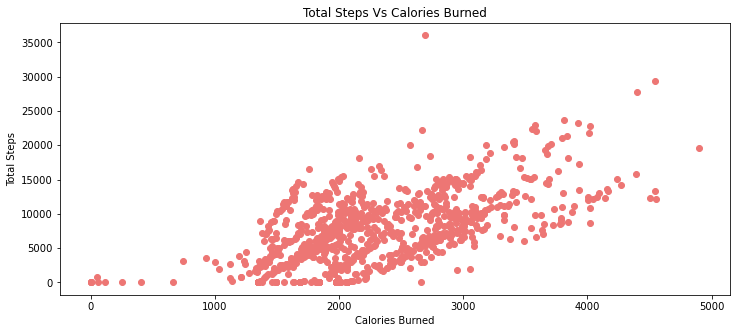

In [43]:
fig, ax = plt.subplots(figsize=(12,5))
plt.scatter(daily_activity.Calories, daily_activity.TotalSteps, color="#ed7674")
plt.xlabel("Calories Burned")
plt.ylabel("Total Steps")
plt.title("Total Steps Vs Calories Burned")
plt.show()

Here it shows a positive correlation between calories burnt and steps taken, which goes a long way to explain why the least calories were burnt on Monday. 

### The Least Active Hour of The Day
Finally I checked to see the least active hours of the day

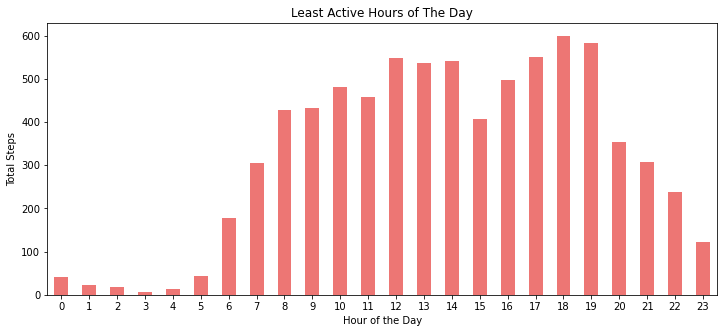

In [44]:
#Least active time of the day for targeted Ads

fig, axs = plt.subplots(figsize=(12, 5))
newhour_merged.groupby(newhour_merged['ActivityHour'].dt.hour)['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, color='#ed7674', title='Least Active Hours of The Day')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Steps")
plt.show()

Here we can see that the least active hours of the day are between 8 p.m and 10 p.m. These are probably the best hours to reach people with targetted ads.

## <span style="color:#ed7674">6. ACT</span>
### Recommendation

1.	**Promotion**: The data we explored revealed that consumers are less active between 8 and 10 p.m., shortly before they retire for the night. This is the ideal moment for Bellabeat to schedule their advertising initiatives for optimal results. Google AdWords, for example, allows internet advertisers to schedule when their adverts are shown with its ad scheduling function. Such functions can allow Bellabeat to effectively reach its consumers. Scheduling adverts will also help Bellabeat save money on advertisements.

2.	**Retention**: The objective of any membership program is not limited to generating a regular stream of new members. Retention is crucial! According to an online **[report](https://themembershipguys.s3-us-west-2.amazonaws.com/Online+Membership+Industry+Report+-+2019.pdf)**, eighty percent of customers quit their subscription to a member site within the first two years of joining the site.  For Bellabeat to retain its consumers, it must focus on personalized contents that offer value. For instance, the data revealed a positive correlation between the number of steps walked and the number of calories burnt. The more steps a person takes each day, the more calories they burn. 

* However, the data revealed that one of the issues people have is that they are hardly able to reach the minimum 10,000 steps per day **[recommended](https://www.healthline.com/health/how-many-steps-a-day#How-many-steps-should-you-take-a-day?)** for healthy adults. To address this issue, Bellabeat can provide fascinating tips to assist its consumers achieve their daily objectives. This may be published periodically on its website. Additionally, it can create engaging challenges to motivate its users to walk regularly. This will not only drive engagement, but also provide enormous value to them. 

* I also noted that people spend far more time being inactive than being active. Inactivity is related with several health problems, including obesity, heart disease, stroke, etc. Bellabeat can create explainer videos and blogs to educate its users about the negative impacts of sedentary lifestyle and how to prevent them. This is also a fantastic opportunity to promote its other products, such as the Bellabeat app, which provides users with lifestyle-related health data, and Time, which links to the Bellabeat app to offer users with insights on their daily wellbeing.

### References

Bubnis, D. (2019, March 8). *How many Steps Do I need a Day?* Healthline. https://www.healthline.com/health/how-many-steps-a-day#How-many-steps-should-you-take-a-day?

Online Membership Industry Report. (2019). https://themembershipguys.s3-us-west-2.amazonaws.com/Online+Membership+Industry+Report+-+2019.pdf